# Load Data

The data source are just excels with the following schema:

|text     |level   |
|---------|--------|
|Some text|1B      |

In [1]:
import os

excels = []
for filename in os.listdir("."):
    if filename.endswith(".xlsx"):
        excels.append(filename)
excels

['trunajod_finetuning.xlsx']

In [2]:
import pandas as pd

df = pd.read_excel(excels[0])
for excel in excels[1:]:
    df = pd.concat([df, pd.read_excel(excel)])

df.head()

,texts,level
0,Era se una vez un pequeño escorpión a la orill...,1B
1,"La cigüeña Aída Agüero, gran creadora de sombr...",1B
2,"En el cuartel, los bomberos están siempre de g...",1B
3,"Cierta vanidosa y acaudalada hormiga, preguntó...",1B
4,"Había una vez un niño que era muy pobre, pero ...",1B


In [14]:
columns = df.columns
texts, levels = df[columns[0]].tolist(), df[columns[1]].tolist()
texts[0:2], levels[0:2]

(['Era se una vez un pequeño escorpión a la orilla de un río, pensando la manera en la que podría cruzarlo y una extraña rana pasaba por allí sin más dilación le preguntó al escorpión: \n - ¿Qué haces aquí parado pensando en la orilla del río? \n -Intento averiguar cómo cruzarlo. - Le contestó el escorpión a la rana. \n -Pues entonces yo puedo ayudarte ¡pero ten cuidado no me vayas a dar con tu aguijón y me piques, o si no nos ahogaremos los dos! \n -No te preocupes intentaré no hacerlo - Dijo el escorpión. \n La rana se tiró al agua y el escorpión se subió encima de ella. \n Cuando iban por la mitad del río el escorpión levantó su cola y picó a la rana y lamentablemente los dos empezaron a ahogarse. La rana antes de morir le preguntó: \n -Pero, ¿por qué has hecho eso? ¡Ahora moriremos los dos! \n -Lo siento mucho, no he podido evitarlo, esa es mi naturaleza. \n Al final los dos animales murieron ahogados. \n Aunque intentes ser otra persona siempre llevaras en tu interior la que de ve

In [4]:
#@title 1 - Esta seccion descarga componentes para Trunajod {display-mode: "form"}
!pip install -U spacy==2.3.7
!python -m spacy download es_core_news_lg

!wget https://github.com/dpalmasan/TRUNAJOD2.0/raw/master/models/trunajod_models_v0.1.tar.gz
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.300k.vec.gz
#!gzip -d fasttext-sbwc.300k.vec.gz
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.vec

!pip install trunajod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 9.5 MB/s eta 0:00:00m eta 0:00:01m6m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.5/370.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.8
    Uninstalling srsly-2.4.8:
      Successfully uninstalled srsly-2.4.8
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.10
    Uninstalling catalogue-2.0.10:
      Successfully uninstalled catalogue-2.0.10
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:


  Created wheel for es_core_news_lg: filename=es_core_news_lg-2.3.1-py3-none-any.whl size=573139080 sha256=e23667fa7d20990776b1ec43b685bb2879406e052a86b01a49b7923d1737b987
  Stored in directory: /home/dpalmasan/.cache/pip/wheels/88/57/b2/b86e789600de24014b8c21a0af0a72d5c77faa22b9e0a41353
Successfully built es_core_news_lg

[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_lg')
--2025-01-13 16:46:32--  https://github.com/dpalmasan/TRUNAJOD2.0/raw/master/models/trunajod_models_v0.1.tar.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dpalmasan/TRUNAJOD2.0/master/models/trunajod_models_v0.1.tar.gz [following]
--2025-01-13 16:46:33--  https://raw.githubusercontent.com/dpalm

In [7]:
#@title 2 - Aquí se instalan dependencias para nuevos índices (dpalma)

!pip install -U pyspellchecker
!pip install -U sentence-transformers
!pip install -U gensim


[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 29.7 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
#@title 3 - Esta seccion carga los componentes de Trunajod a la memoria {display-mode: "form"}
import TRUNAJOD.lexico_semantic_norms as lsn
import TRUNAJOD.surface_proxies as sp
import TRUNAJOD.semantic_measures as sm
import TRUNAJOD.ttr as ttr
import TRUNAJOD.givenness as gv
import TRUNAJOD.utils as utils
import TRUNAJOD.discourse_markers as dm
import TRUNAJOD.entity_grid as eg
import tarfile
import pickle
import spacy
import es_core_news_lg
import math
from gensim.models.keyedvectors import KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


class ModelLoader(object):  # loads pretrained models for trunajod
    def __init__(self, model_file):
        tar = tarfile.open(model_file, "r:gz")
        self.crea_frequency = {}
        self.infinitive_map = {}
        self.lemmatizer = {}
        self.spanish_lexicosemantic_norms = {}
        self.stopwords = {}
        self.wordnet_noun_synsets = {}
        self.wordnet_verb_synsets = {}

        for member in tar.getmembers():
            f = tar.extractfile(member)
            if "crea_frequency" in member.name:
                self.crea_frequency = pickle.loads(f.read())
            if "infinitive_map" in member.name:
                self.infinitive_map = pickle.loads(f.read())
            if "lemmatizer" in member.name:
                self.lemmatizer = pickle.loads(f.read())
            if "spanish_lexicosemantic_norms" in member.name:
                self.spanish_lexicosemantic_norms = pickle.loads(f.read())
            if "stopwords" in member.name:
                self.stopwords = pickle.loads(f.read())
            if "wordnet_noun_synsets" in member.name:
                self.wordnet_noun_synsets = pickle.loads(f.read())
            if "wordnet_verb_synsets" in member.name:
                self.wordnet_verb_synsets = pickle.loads(f.read())

##################################################################
class TRUNAJOD(object):
    def __init__(self):
        self.nlp = es_core_news_lg.load(disable=["ner", "textcat"])
        self.model = ModelLoader("trunajod_models_v0.1.tar.gz")
        #self.fasttext = KeyedVectors.load_word2vec_format('fasttext-sbwc.300k.vec')
        # self.fasttext = KeyedVectors.load_word2vec_format('wiki.es.vec')

    def dimensiones(self, text):
        doc = self.nlp(text)
        ttr_values = self.type_token_ratio(doc)
        sm_values = self.semantic_measures(doc)
        lsn_values = self.lexico_semantic_norms(doc)
        eg_values = self.entity_grid(doc)
        sp_values = self.surface_proxies(doc)
        dm_values = self.discourse_markers(doc)
        gv_values = self.givenness(doc)

        dimension_1 = [ # D1 Similitud Léxica
            ttr_values[0] * 0.491,    # lemma_ttr         * 0,491
            ttr_values[4] * 0.424,    # adj_ttr           * 0,424
            ttr_values[9] * 0.754,    # argument_ttr      * 0,754
            ttr_values[1] * 0.449,    # verb_ttr	         * 0,449
            ttr_values[0] * 0.933,    # noun_ttr	         * 0,933
            sm_values[0] * -0.539,    # noun_syn_overlap  *-0,539
            ttr_values[3] * 0.912,    # content_ttr       * 0,912
            ttr_values[8] * 0.611 ]   # Diversidad léxica MTLD * 0,611

        dimension_2 = [ # D2 Conectividad
            sm_values[3] * 0.788,     # lexical_overlap		0,788
            sm_values[0] * 0.445,     # noun_syn_overlap	0,445
            sm_values[2] * 0.589,     # word2vec_sent_sim		0,589
            dm_values[1] * 0.563,     # cause_dm		0,563
            sm_values[2] * 0.357,     # verb_syn_overlap		0,357
            dm_values[0] * 0.412,     # polysemic_dm		0,412
            dm_values[2] * 0.908,     # closed_class_words		0,908
            eg_values[4] * 0.360,     # egraph_lc_pw_dist		    0,360
            eg_values[5] * 0.317,     # egraph_lc_pacc_dist		0,317
            dm_values[3] * 0.940,     # marcadores_oracion		0,940
            sp_values[4] * 0.868,     # Promedio Longitud Oracion		0,868
            sp_values[15] * 0.785,    # Densidad de Cláusula		0,785
            sp_values[8] * 0.470,     # Palabras antes de la raíz		0,470
            sp_values[0] * -0.317,    # Densidad Léxica		    -0,317
            sm_values[4] * 0.545,     # coherence_fasttext		0,545 ??
            sm_values[5] * 0.385      # semantic_giveness		0,385 ??
        ]

        dimension_3 = [ # D3 Coherencia referencial
            ttr_values[0] * -0.428,     # lemma_ttr             * -0,428
            ttr_values[9] * -0.301,     # argument_ttr          * -0,301
            ttr_values[7] * -0.690,     # prp_ttr			    * -0,690
            eg_values[0] * 0.979,       # egraph_lc_pu		    *   0,979
            eg_values[1] * 0.851,       # egraph_lc_pw			*   0,851
            eg_values[2] * 0.932,       # egraph_lc_pacc        *   0,932
            eg_values[3] * 0.709,       # egraph_lc_pu_dist		*   0,709
            eg_values[4] * 0.539,       # egraph_lc_pw_dist		*   0,539
            eg_values[5] * 0.658  ]     # egraph_lc_pacc_dist	*   0,658

        dimension_4 = [ # D4 Concresión
            lsn_values[3] * -0.434,     # avg_context_availability	        -0,434
            sp_values[9] * 0.988,       # Promedio Longitud Palabras sílaba	 0,988
            sp_values[5] * 0.985,       # Promedio Longitud Palabras letra	 0,985
            sp_values[0] * 0.403,       # Densidad Léxica		             0,403
            sp_values[12] * 0.497,      # Densidad de ADJ				     0,497
            lsn_values[0] * -0.552,     # concreteness				        -0,552
            lsn_values[1] * -0.576,     # imageability				        -0,576
            lsn_values[2] * -0.344 ]    # familiarity				        -0,344

        dimension_5 = [ # D5 Narratividad
            gv_values[1] * 0.469,       # pronoun_noun_ratio		0,469
            sm_values[2] * -0.315,      # word2vec_sent_sim		-0,315
            gv_values[0] * 0.390,       # pronoun_density			0,390
            sp_values[14] * -0.711,     # Promedio Longitud Cláusula	-0,711
            sp_values[15] * 0.543,      # Densidad de Cláusula		0,543
            sp_values[6] * 0.432,       # Densidad Número de 1,2 persona	0,432
            sp_values[7] * 0.463,       # Densidad de negación		0,463
            sp_values[3] * 0.958,       # Verbos / Sustantivos		0,958
            sp_values[10] * -0.851,     # Densidad de NOUN|PROPN		-0,851
            sp_values[11] * -0.370,     # Densidad de NOUN			-0,370
            sp_values[13] * 0.915  ]    # Densidad de VERB|AUX		0,915

        return [sum(dimension_1), sum(dimension_2), sum(dimension_3), sum(dimension_4), sum(dimension_5)]
##################################################################
    def indices(self, text):
        doc = self.nlp(text)
        ttr_values = self.type_token_ratio(doc)
        sm_values = self.semantic_measures(doc)
        lsn_values = self.lexico_semantic_norms(doc)
        eg_values = self.entity_grid(doc)
        sp_values = self.surface_proxies(doc)
        dm_values = self.discourse_markers(doc)
        gv_values = self.givenness(doc)

        # print('ttr: ', len(ttr_values),'\tType token ratios')
        # print('sm : ', len(sm_values),'\tSemantic measures')
        # print('lsm: ', len(lsn_values),'\tLexico semantic norms')
        # print('eg : ', len(eg_values),'\tEntity grid')
        # print('sp : ', len(sp_values),'\tSurface proxies')
        # print('dm : ', len(dm_values),'\tDiscourse markers')
        # print('gv : ', len(gv_values),'\tGivenness')

        return ttr_values + sm_values + lsn_values + eg_values + sp_values + dm_values + gv_values

##################################################################
    def type_token_ratio(self, doc):
        lemma = utils.get_token_lemmas(doc, self.model.lemmatizer, self.model.stopwords)

        return ( # must avoid div by 0 so use if statement
            ttr.type_token_ratio(utils.flatten(lemma)),                  # 0 lemma
            0 if len(lemma[0]) == 0 else ttr.type_token_ratio(lemma[0]), # 1 noun
            0 if len(lemma[1]) == 0 else ttr.type_token_ratio(lemma[1]), # 2 verb
            0 if len(lemma[2]) == 0 else ttr.type_token_ratio(lemma[2]), # 3 function
            0 if len(lemma[3]) == 0 else ttr.type_token_ratio(lemma[3]), # 4 content
            0 if len(lemma[4]) == 0 else ttr.type_token_ratio(lemma[4]), # 5 adj
            0 if len(lemma[5]) == 0 else ttr.type_token_ratio(lemma[5]), # 6 adv
            0 if len(lemma[6]) == 0 else ttr.type_token_ratio(lemma[6]), # 7 prp
            ttr.lexical_diversity_mtld(doc),                             # 8 diversity_mtld
            0 if len(lemma[6]) == 0 and len(lemma[0]) == 0               # 9 argument
              else ttr.type_token_ratio( utils.flatten((lemma[0],lemma[6])) )
        )

    def lexico_semantic_norms(self, doc):
        lsn_doc = lsn.LexicoSemanticNorm(doc, self.model.spanish_lexicosemantic_norms, self.model.lemmatizer)

        return (
            lsn_doc.get_concreteness(),         # 0 concreteness
            lsn_doc.get_imageability(),         # 1 imageability
            lsn_doc.get_familiarity(),          # 2 familiarity
            lsn_doc.get_context_availability(),   # 3 avg_context_availability
            lsn_doc.get_valence()               # 4 valence
        )

    def semantic_measures(self, doc):
        if len(list(doc.sents)) < 2 :
            return [0,0,0,0]
        lemma = utils.get_token_lemmas(doc, self.model.lemmatizer, self.model.stopwords)
        N = len(list(doc.sents))
        return (
            sm.overlap(lemma[0], self.model.wordnet_noun_synsets),              # 0 noun_syn_overlap
            sm.overlap(lemma[1], self.model.wordnet_verb_synsets),              # 1 verb_syn_overlap
            sm.avg_w2v_semantic_similarity(doc.sents, N),                       # 2 word2vec_sent_sim
            sm.overlap(utils.flatten( (lemma[3],lemma[4]) ),
                {**self.model.wordnet_verb_synsets, **self.model.wordnet_noun_synsets} ), # 3 lexical_overlap
            self.coherence_fasttext(doc),     # 4 coherence_fasttext
            self.semantic_giveness(doc)     # 5 semantic_giveness
        )

    def entity_grid(self, doc):
        if len(list(doc.sents)) < 2 :
            return [0,0,0,0,0,0]

        eg_doc = eg.EntityGrid(doc)
        return eg.get_local_coherence(eg_doc)

    def surface_proxies(self, doc):
        if len(list(doc.sents)) < 2 :
            return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

        try:
            avg_clause_length = sp.average_clause_length(doc, self.model.infinitive_map)
        except ZeroDivisionError:
            avg_clause_length = 0
        return (
            sp.lexical_density(doc),                # 0 Densidad Léxica
            sp.connection_words_ratio(doc),         # 1 ratio of connecting words
            sp.syntactic_similarity(doc),           # 2 average syntactic similarity
            sp.verb_noun_ratio(doc),                # 3 Verbos / Sustantivos
            sp.average_sentence_length(doc),        # 4 Promedio Longitud Oracion
            sp.average_word_length(doc),            # 5 Promedio Longitud Palabras letra
            sp.first_second_person_density(doc),    # 6 Densidad Número de 1,2 persona
            sp.negation_density(doc),               # 7 Densidad de negación
            sp.words_before_root(doc),              # 8 Palabras antes de la raíz
            sp.syllable_word_ratio(doc),            # 9 Promedio Longitud Palabras sílaba
            sp.pos_ratio(doc, "NOUN|PROPN"),        # 10 Densidad de NOUN|PROPN
            sp.pos_ratio(doc, "NOUN"),              # 11 Densidad de NOUN
            sp.pos_ratio(doc, "ADJ"),               # 12 Densidad de ADJ
            sp.pos_ratio(doc, "VERB|AUX"),          # 13 Densidad de VERB|AUX
            avg_clause_length, # 14 Promedio Longitud Cláusula
            sp.subordination(doc, self.model.infinitive_map)          # 15 Densidad de Cláusula
        )

    def discourse_markers(self, doc):
        return(
            self.get_polysemic_dm_count(doc),                # 0 polysemic discourse markers
            self.get_cause_dm_count(doc),                    # 1 Count discourse markers associated with cause (cause_dm)
            self.get_closed_class_vague_meaning_count(doc),  # 2 Count words that have vague meaning (closed_class_words)
            self.get_overall_markers(doc)                    # 3 Count all types of discourse markers
        )

    def givenness(self, doc):
        return(
            gv.pronoun_density(doc),          # 0 Pronoun density
            gv.pronoun_noun_ratio(doc)        # 1 Pronoun Noun ratio
        )
##################################################################
### Discourse markers updated (spacy v3+) indicators
    def get_polysemic_dm_count(self, doc) -> float:
        sentences = [
            dm.find_matches(sent.text.strip(), dm.HIGHLY_POLYSEMIC_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]
        return sum(sentences) / len(sentences)

    def get_cause_dm_count(self, doc) -> float:
        sentences = [
            dm.find_matches(sent.text.strip(), dm.CAUSE_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]
        return sum(sentences) / len(sentences)

    def get_closed_class_vague_meaning_count(self, doc) -> float:
        sentences = [
            dm.find_matches(sent.text.strip(), dm.VAGUE_MEANING_CLOSED_CLASS_WORDS)
            for sent in doc.sents
        ]
        return sum(sentences) / len(sentences)

    def get_overall_markers(self, doc) -> float:
        sentences = []
        sentences += [
            dm.find_matches(sent.text.strip(), dm.VAGUE_MEANING_CLOSED_CLASS_WORDS)
            for sent in doc.sents
        ]

        sentences += [
            dm.find_matches(sent.text.strip(), dm.HIGHLY_POLYSEMIC_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]

        sentences += [
            dm.find_matches(sent.text.strip(), dm.CONTEXT_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]

        sentences += [
            dm.find_matches(sent.text.strip(), dm.EQUALITY_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]

        sentences += [
            dm.find_matches(sent.text.strip(), dm.CAUSE_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]

        sentences += [
            dm.find_matches(sent.text.strip(), dm.REVISION_DISCOURSE_MARKERS)
            for sent in doc.sents
        ]
        return sum(sentences) / len(sentences)
##################################################################
### Semantic-based
    # Semantic givenness
    def semantic_giveness(self, doc):
      return None
      tfidf = TfidfVectorizer()
      svd = TruncatedSVD(n_components=5)
      txt=[]
      for sent in doc.sents:
        txt.append(sent.text)
      svd.fit_transform(tfidf.fit_transform(txt))

      txt_c = ""
      dist = 0
      length = (len(list(doc.sents)) - 1 if len(list(doc.sents)) > 1 else 1)

      for sent_i, sent in enumerate(doc.sents):
        if sent_i == 0:
          txt_c += sent.text + " "
        else:
          base = svd.transform(tfidf.transform([txt_c]))
          newer = svd.transform(tfidf.transform([sent.text]))
          dist += cosine_similarity(base, newer)[0][0]
          txt_c += sent.text + " "

      return dist / length

    # # coherence_fasttext
    def coherence_fasttext(self, doc):
      return None
      avg = 0
      length = (len(list(doc.sents)) - 1 if len(list(doc.sents)) > 1 else 1)
      for sent_i, sent in enumerate(doc.sents):
        curr = sent.text.lower().split()
        if sent_i != 0:
          sim = self.fasttext.wmdistance(curr, prev)
          if not math.isinf(sim):
            avg += sim
        prev = curr
      return avg / length


##################################################################
trj_ = TRUNAJOD()

In [295]:
#@title 4 - Aquí se defininen los nuevos índices semánticos de TRUNAJOD (dpalma)

from spellchecker import SpellChecker
import re
from typing import List
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_distances
import numpy as np
from collections import defaultdict


model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')


def fix_text(word_list, unknown_words):
    fixed_word_list = [
        word if word not in unknown_words else spellchecker.correction(word) for word in word_list
    ]
    return " ".join(filter(lambda x: x and x is not None, fixed_word_list))

def get_fixed_sentences(text, unknown_words, window_size=15, overlap=5):
    word_list = [
        word for word in map(str.lower, filter(lambda x: x, re.split("[^\w]", text)))]

    return list(filter(len, map(lambda x: fix_text(x, unknown_words), segment_text(word_list, window_size, overlap))))


def get_spell_errors(text):
    word_list = [
        word for word in map(str.lower, filter(lambda x: x, re.split("[^\w]", text)))]

    unknown_words = spellchecker.unknown(word_list)
    return unknown_words


def segment_text(tokens: List[str], window_size: int, overlap: int) -> List[str]:
    i_next = 0
    segments = []
    while i_next + window_size - overlap < len(tokens):
        segments.append(tokens[i_next:i_next + window_size])
        i_next += (window_size - overlap)
    return segments

def average_sentence_cos_dist(embeddings):
    return np.mean(list(map(lambda x: 1 - util.pytorch_cos_sim(x[0], x[1])[0][0], zip(embeddings, embeddings[1:]))))

def max_sentence_cos_dist(embeddings):
    return np.max(list(map(lambda x: 1 - util.pytorch_cos_sim(x[0], x[1])[0][0], zip(embeddings, embeddings[1:]))))

def min_sentence_cos_dist(embeddings):
    return np.min(list(map(lambda x: 1 - util.pytorch_cos_sim(x[0], x[1])[0][0], zip(embeddings, embeddings[1:]))))


spellchecker = SpellChecker(language='es')

text = (
    "Es importante estudiar en sexto, septimo y octavo grado "
    "por que si lo haces constante mente se va hacer habitual. "
    "Estudiar tiene aventajas por ejemplo si estudias diario "
    "vas a sacar buenas calificaciones en examenes y en las "
    "classes en general.Y por sacar buenas calificaciones "
    "vas a poder en la high schol desde novano grado empezar "
    "classes dificiles como de AP oh de Honors. y como hicistes "
    "un habito estudiar desde middle school se te va hacer mas "
    "facil pasar las clases en high school. Vas a estar mas "
    "avancado que los que no estudian.  Pero si hay algunas "
    "desventajas por ejemplo si tomas todo tu tiempo libre para "
    "estudiar no vas a tener tiempo para juntarte con amigos oh "
    "hablar con amigos oh hasta hacer nuevos amigos. O si te "
    "gusta los deportes pero prefieres estudiar nunca vas a "
    "poder enforcate en un deporte que te guste y no vas a "
    "poder jugar en un equipo . Tambien si te gusta mucho usar "
    "tu telefono o otra technologia va hacer muy dificil dejarlos "
    "y estudiar o si estudias no vas a poder usarlos tanto. "
    "En conclusion estudiar tiene ventajas y desentajas pero "
    "yo creo que estudiar si te ayuda mucho aunque tiene algunas "
    "desventajas como no usar telefono tanto o juntarse con amigos "
    "mucho yo prefiero estudiar y sacar buenos grados para ir a una universidad buena."
)
unk_words = get_spell_errors(text)
fixed_sentences = get_fixed_sentences(text, unk_words)
embeddings = model.encode(fixed_sentences)
avg_cos_dist = average_sentence_cos_dist(embeddings)
max_cos_dist = max_sentence_cos_dist(embeddings)
min_cos_dist = min_sentence_cos_dist(embeddings)
max_min_dist_ratio = max_cos_dist / min_cos_dist
dist = cosine_distances(embeddings)
nn_distances = np.min(dist + np.diag(np.diag(dist) + 10), axis=1)
avg_nn_distance = np.mean(nn_distances)
max_nn_distance = np.max(nn_distances)
min_nn_distance = np.min(nn_distances)
max_min_nn_dist = max_nn_distance / min_nn_distance
r_distance = 2*np.sqrt(dist.shape[0])*avg_nn_distance
cum_freq_dist_nn_dist = np.mean(nn_distances <= avg_nn_distance)
givenness = []
for i in range(2, len(embeddings)):
    x = embeddings[0:i]
    u, s, vh = np.linalg.svd(x)
    orthonormal_vector = vh[-1]
    givenness.append(util.pytorch_cos_sim(embeddings[i], orthonormal_vector)[0][0])

avg_givenness = np.mean(givenness)
max_givenness = np.max(givenness)
min_givenness = np.min(givenness)
givenness_proj = []
for i in range(2, len(embeddings)):
    x = embeddings[0:i]
    A = x.T
    b = embeddings[i]
    c = np.linalg.lstsq(A, b, rcond=None)[0]
    bw = A.dot(c)
    bwo = b - bw
    N = util.pytorch_cos_sim(b, bwo)[0][0]
    G = util.pytorch_cos_sim(b, bw)[0][0]
    givenness_proj.append(N / (G + N))

avg_givenness_proj = np.mean(givenness_proj)
min_givenness_proj = np.min(givenness_proj)
max_givenness_proj = np.max(givenness_proj)
max_min_giv_ratio = max_givenness / min_givenness

prob_dist = defaultdict(int)
total = 0
for segment in fixed_sentences:
    for token in segment.split():
        prob_dist[token] += 1
        total += 1

for token in prob_dist:
    prob_dist[token] /= total

n = len(prob_dist)
uniform_prob = 1/n
kl_div = sum(prob_dist[token]*np.log(
    prob_dist[token]/uniform_prob) for token in prob_dist)
centroid = np.sum(embeddings, axis=0) / len(embeddings)
dist_to_centroid = []
for embedding in embeddings:
    dist_to_centroid.append(util.pytorch_cos_sim(centroid, embedding)[0][0])

avg_dist_to_centroid = np.mean(dist_to_centroid)
max_dist_to_centroid = np.max(dist_to_centroid)
min_dist_to_centroid = np.min(dist_to_centroid)
std_distance = np.sqrt(np.sum(np.sum(
    (embeddings - centroid)**2, axis=1))/len(embeddings))
relative_distance = std_distance / max_dist_to_centroid
det_dist = np.linalg.det(dist)
results = {
    "avg_cos_dist": avg_cos_dist,
    "max_cos_dist": max_cos_dist,
    "min_cos_dist": min_cos_dist,
    "max_min_dist_ratio": max_min_dist_ratio,
    "avg_nn_distance": avg_nn_distance,
    "max_nn_distance": max_nn_distance,
    "min_nn_distance": min_nn_distance,
    "max_min_nn_dist": max_min_nn_dist,
    "r_distance": r_distance,
    "cum_freq_dist_nn_dist": cum_freq_dist_nn_dist,
    "avg_givenness": avg_givenness,
    "max_givenness": max_givenness,
    "min_givenness": min_givenness,
    "max_min_giv_ratio": max_min_giv_ratio,
    "approx_spell_errors": len(unk_words),
    "avg_givenness_proj": avg_givenness_proj,
    "min_givenness_proj": min_givenness_proj,
    "max_givenness_proj": max_givenness_proj,
    "max_min_giv_ratio": max_min_giv_ratio,
    "kl_div": kl_div,
    "avg_dist_to_centroid": avg_dist_to_centroid,
    "max_dist_to_centroid": max_dist_to_centroid,
    "min_dist_to_centroid": min_dist_to_centroid,
    "std_distance": std_distance,
    "relative_distance": relative_distance,
    "det_dist": det_dist,
}

In [12]:
import numpy as np

def get_trunajod_results(text):
    word_list = [
        word for word in filter(lambda x: x, re.split("[^\w]", text))]
    fixed_text = text.lower()
    for word in word_list:
        replacement = spellchecker.correction(word)
        fixed_text = fixed_text.replace(word, word if replacement is None else replacement)
    unk_words = get_spell_errors(text)
    fixed_sentences = get_fixed_sentences(text, unk_words, window_size=10, overlap=5)
    embeddings = model.encode(fixed_sentences)
    avg_cos_dist = average_sentence_cos_dist(embeddings)
    max_cos_dist = max_sentence_cos_dist(embeddings)
    min_cos_dist = min_sentence_cos_dist(embeddings)
    max_min_dist_ratio = max_cos_dist / min_cos_dist
    dist = cosine_distances(embeddings)
    nn_distances = np.min(dist + np.diag(np.diag(dist) + 10), axis=1)
    avg_nn_distance = np.mean(nn_distances)
    max_nn_distance = np.max(nn_distances)
    min_nn_distance = np.min(nn_distances)
    max_min_nn_dist = max_nn_distance / min_nn_distance
    r_distance = 2*np.sqrt(dist.shape[0])*avg_nn_distance
    cum_freq_dist_nn_dist = np.mean(nn_distances <= avg_nn_distance)
    givenness = []
    for i in range(2, len(embeddings)):
        x = embeddings[0:i]
        u, s, vh = np.linalg.svd(x)
        orthonormal_vector = vh[-1]
        givenness.append(util.pytorch_cos_sim(embeddings[i], orthonormal_vector)[0][0])

    avg_givenness = np.mean(givenness)
    max_givenness = np.max(givenness)
    min_givenness = np.min(givenness)
    givenness_proj = []
    for i in range(2, len(embeddings)):
        x = embeddings[0:i]
        A = x.T
        b = embeddings[i]
        c = np.linalg.lstsq(A, b, rcond=None)[0]
        bw = A.dot(c)
        bwo = b - bw
        N = util.pytorch_cos_sim(b, bwo)[0][0]
        G = util.pytorch_cos_sim(b, bw)[0][0]
        givenness_proj.append(N / (G + N))

    avg_givenness_proj = np.mean(givenness_proj)
    min_givenness_proj = np.min(givenness_proj)
    max_givenness_proj = np.max(givenness_proj)
    max_min_giv_ratio = max_givenness / min_givenness

    prob_dist = defaultdict(int)
    total = 0
    for segment in fixed_sentences:
        for token in segment.split():
            prob_dist[token] += 1
            total += 1

    for token in prob_dist:
        prob_dist[token] /= total

    n = len(prob_dist)
    uniform_prob = 1/n
    kl_div = sum(prob_dist[token]*np.log(
        prob_dist[token]/uniform_prob) for token in prob_dist)
    centroid = np.sum(embeddings, axis=0) / len(embeddings)
    dist_to_centroid = []
    for embedding in embeddings:
        dist_to_centroid.append(util.pytorch_cos_sim(centroid, embedding)[0][0])

    avg_dist_to_centroid = np.mean(dist_to_centroid)
    max_dist_to_centroid = np.max(dist_to_centroid)
    min_dist_to_centroid = np.min(dist_to_centroid)
    std_distance = np.sqrt(np.sum(np.sum(
        (embeddings - centroid)**2, axis=1))/len(embeddings))
    relative_distance = std_distance / max_dist_to_centroid
    det_dist = np.linalg.det(dist)

    trj = trj_.indices(fixed_text)

    return {
        "TTR lemma": trj[0],
        "TTR noun": trj[1],
        "TTR verb": trj[2],
        "TTR function": trj[3],
        "TTR content": trj[4],
        "TTR adj": trj[5],
        "TTR adv": trj[6],
        "TTR prp": trj[7],
        "TTR Diversidad léxica MTLD": trj[8],
        "TTR argument": trj[9],
        "SM noun_syn_overlap": trj[10],
        "SM verb_syn_overlap": trj[11],
        "SM word2vec_sent_sim": trj[12],
        "SM lexical_overlap": trj[13],
        "LSM concreteness": trj[16],
        "LSM imageability": trj[17],
        "LSM familiarity": trj[18],
        "LSM avg_context_availability": trj[19],
        "LSM argument_ttr": trj[20],
        "EG local_coherence_PU": trj[21],
        "EG local_coherence_PW": trj[22],
        "EG local_coherence_PACC": trj[23],
        "EG local_coherence_PU_dist": trj[24],
        "EG local_coherence_PW_dist": trj[25],
        "EG local_coherence_PACC_dist": trj[26],
        "SP Densidad Léxica": trj[27],
        "SP Verbos / Sustantivos": trj[28],
        "SP connecting words": trj[29],
        "SP syntactic similarity": trj[30],
        "SP Promedio Longitud Oracion": trj[31],
        "SP Promedio Longitud Palabras letra": trj[32],
        "SP Densidad Número de 1,2 persona": trj[33],
        "SP Densidad de negación": trj[34],
        "SP Palabras antes de la raíz": trj[35],
        "SP Promedio Longitud Palabras sílaba": trj[36],
        "SP Densidad de NOUN|PROPN": trj[37],
        "SP Densidad de NOUN": trj[38],
        "SP Densidad de ADJ": trj[39],
        "SP Densidad de VERB|AUX": trj[40],
        "SP Promedio Longitud Cláusula": trj[41],
        "SP Densidad de Cláusula": trj[42],
        "DM polysemic discourse markers": trj[43],
        "DM cause discourse markers": trj[44],
        "DM vague meaning": trj[45],
        "DM all types of discourse markers": trj[46],
        "GV Pronoun density": trj[47],
        "GV Pronoun Noun ratio": trj[48],
        "avg_cos_dist": avg_cos_dist,
        "max_cos_dist": max_cos_dist,
        "min_cos_dist": min_cos_dist,
        "max_min_dist_ratio": max_min_dist_ratio,
        "avg_nn_distance": avg_nn_distance,
        "max_nn_distance": max_nn_distance,
        "min_nn_distance": min_nn_distance,
        "max_min_nn_dist": max_min_nn_dist,
        "r_distance": r_distance,
        "cum_freq_dist_nn_dist": cum_freq_dist_nn_dist,
        "avg_givenness": avg_givenness,
        "max_givenness": max_givenness,
        "min_givenness": min_givenness,
        "max_min_giv_ratio": max_min_giv_ratio,
        "approx_spell_errors": len(unk_words),
        "avg_givenness_proj": avg_givenness_proj,
        "min_givenness_proj": min_givenness_proj,
        "max_givenness_proj": max_givenness_proj,
        "max_min_giv_ratio": max_min_giv_ratio,
        "kl_div": kl_div,
        "avg_dist_to_centroid": avg_dist_to_centroid,
        "max_dist_to_centroid": max_dist_to_centroid,
        "min_dist_to_centroid": min_dist_to_centroid,
        "std_distance": std_distance,
        "relative_distance": relative_distance,
        "det_dist": det_dist,
    }

In [15]:
for text, level in zip(texts, levels):
    break
print(text, level)
type(text), type(level)

Era se una vez un pequeño escorpión a la orilla de un río, pensando la manera en la que podría cruzarlo y una extraña rana pasaba por allí sin más dilación le preguntó al escorpión: 
 - ¿Qué haces aquí parado pensando en la orilla del río? 
 -Intento averiguar cómo cruzarlo. - Le contestó el escorpión a la rana. 
 -Pues entonces yo puedo ayudarte ¡pero ten cuidado no me vayas a dar con tu aguijón y me piques, o si no nos ahogaremos los dos! 
 -No te preocupes intentaré no hacerlo - Dijo el escorpión. 
 La rana se tiró al agua y el escorpión se subió encima de ella. 
 Cuando iban por la mitad del río el escorpión levantó su cola y picó a la rana y lamentablemente los dos empezaron a ahogarse. La rana antes de morir le preguntó: 
 -Pero, ¿por qué has hecho eso? ¡Ahora moriremos los dos! 
 -Lo siento mucho, no he podido evitarlo, esa es mi naturaleza. 
 Al final los dos animales murieron ahogados. 
 Aunque intentes ser otra persona siempre llevaras en tu interior la que de verdad eres. 1B

(str, str)

In [19]:
from tqdm import tqdm

results = []

for text, level in tqdm(zip(texts, levels), total=len(texts)):
    try:
        trunajod_result = get_trunajod_results(text)
    except Exception as e:
        print(f"Falló {e}")
        continue
    result = {"text": text, "level": level}
    result.update(trunajod_result)
    results.append(result)

  6%|███████▋                                                                                                                                 | 37/660 [12:44<4:44:40, 27.42s/it]/tmp/ipykernel_29849/1855124220.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  max_min_nn_dist = max_nn_distance / min_nn_distance
 19%|█████████████████████████▎                                                                                                              | 123/660 [47:11<4:16:59, 28.72s/it]/tmp/ipykernel_29849/1855124220.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  max_min_nn_dist = max_nn_distance / min_nn_distance
 38%|███████████████████████████████████████████████████▌                                                                                  | 254/660 [1:48:22<3:50:24, 34.05s/it]/home/dpalmasan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/TRUNAJOD/semantic_measures.py:38: UserWarning: [W008] Evaluating Span.similarity based on empty 

In [347]:
df = pd.DataFrame(results)
df.to_excel("shortener_trunajod_indices.xlsx")

ValueError: If using all scalar values, you must pass an index

In [324]:
df.shape

(660, 74)

In [327]:
level_map = {
    "1B": 0,
    "2B": 0,
    "3B": 1,
    "4B": 1,
    "5B": 2,
    "6B": 2,
    "7B": 3,
    "8B": 3,
}

In [343]:
df["group"] = df["level"].apply(lambda x: level_map[x])

In [ ]:
df_new = df.replace([np.inf, -np.inf], np.nan)
df_new = df.dropna()

In [331]:
colors = {
    0: "r",
    1: "g",
    2: "b",
    3: "m",
}
colors[group]

'r'

# Plotting Centroids Based on all Indices

Here we just compute the mean of vectors based on the group, to have have insights on how separated are the groups.

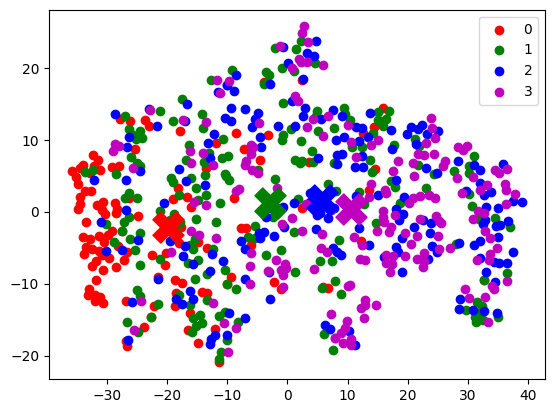

In [335]:
centroids = {}
tsne_centroids = {}
groups = {}
group_values = list(set(level_map.values()))
for group in group_values:
    group_idx = df_new["group"] == group
    X_centroid = X.values[group_idx, :].mean(axis=0)
    centroids[group] = X_centroid
    groups[group] = group_idx
    plt.scatter(X_tsne[group_idx, 0], X_tsne[group_idx, 1], c=colors[group])
    X_centroid_tsne = X_tsne[group_idx, :].mean(axis=0)
    tsne_centroids[group] = X_centroid_tsne
    
plt.legend(group_values)
for group in group_values:
    X_centroid_tsne = tsne_centroids[group]
    plt.scatter(X_centroid_tsne[0], X_centroid_tsne[1], c=colors[group], marker="X", s=500)